In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Paso 1: Cargar el dataset
moviesdataset = pd.read_csv("C:/Users/Fede/Documents/Henry/Labs/Fanny/moviesdataset.csv")


In [3]:
# Paso 2: Análisis Exploratorio de Datos (EDA)

In [4]:
# Estadísticas descriptivas
print(moviesdataset.describe())

             budget             id    popularity       revenue       runtime  \
count  4.537600e+04   45376.000000  45376.000000  4.537600e+04  45130.000000   
mean   4.232604e+06  108027.103094      2.926458  1.123010e+07     94.181675   
std    1.743986e+07  112168.377996      6.009672  6.438996e+07     38.341059   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26385.750000      0.388840  0.000000e+00     85.000000   
50%    0.000000e+00   59857.500000      1.130454  0.000000e+00     95.000000   
75%    0.000000e+00  156533.500000      3.691695  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count        return  
count  45376.000000  45376.000000  4.537600e+04  
mean       5.624070    110.096439  6.600428e+02  
std        1.915423    491.742894  7.469329e+04  
min        0.000000      0.000000  0.000000e+00  
25%        5.000000      3.00

array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'return'}>, <Axes: >]], dtype=object)

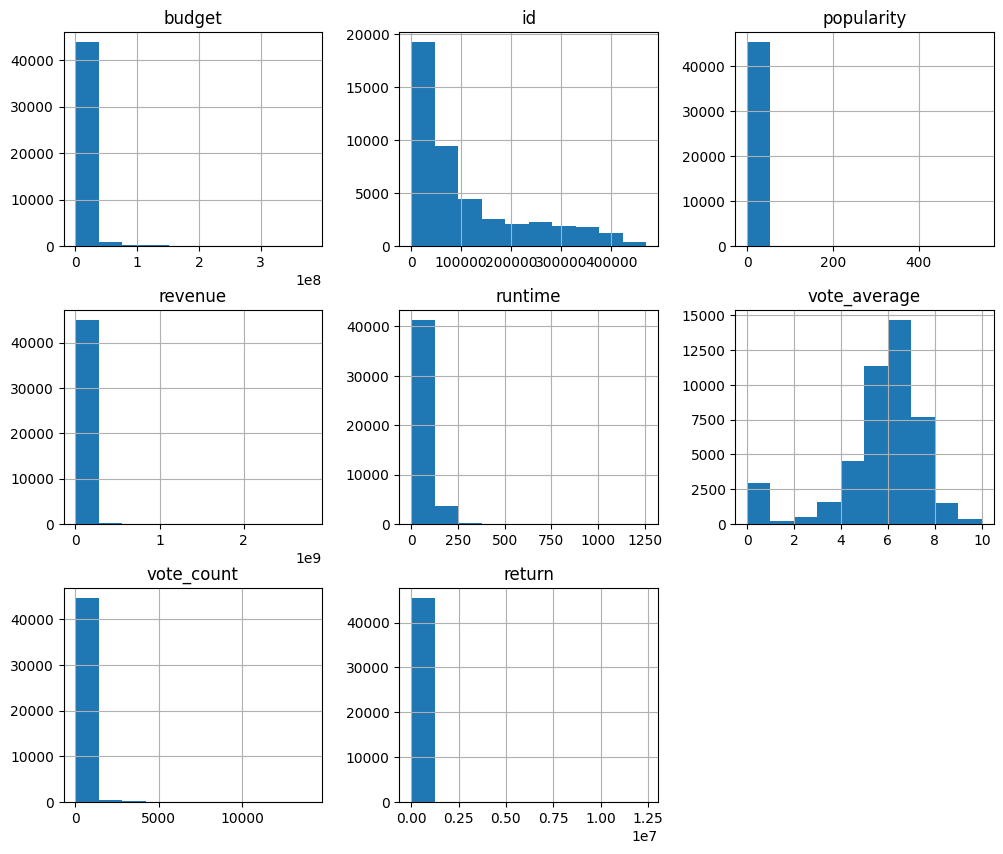

In [5]:
# Distribuciones de variables numéricas
moviesdataset.hist(figsize=(12, 10))

In [6]:
# Matriz de correlación
correlation_matrix = moviesdataset.corr()
print(correlation_matrix)

                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.101317    0.449568  0.768761  0.134742   
id           -0.101317  1.000000   -0.082473 -0.071005 -0.119412   
popularity    0.449568 -0.082473    1.000000  0.506158  0.129662   
revenue       0.768761 -0.071005    0.506158  1.000000  0.103940   
runtime       0.134742 -0.119412    0.129662  0.103940  1.000000   
vote_average  0.073165 -0.165266    0.153773  0.083799  0.156732   
vote_count    0.676611 -0.064496    0.559925  0.812010  0.113515   
return       -0.002136 -0.006756    0.003214  0.000791  0.000891   

              vote_average  vote_count    return  
budget            0.073165    0.676611 -0.002136  
id               -0.165266   -0.064496 -0.006756  
popularity        0.153773    0.559925  0.003214  
revenue           0.083799    0.812010  0.000791  
runtime           0.156732    0.113515  0.000891  
vote_average      1.000000    0.123600  0.005589  
vote_count        0.123600    

C:\Users\Fede\AppData\Local\Temp\ipykernel_1176\1744386018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = moviesdataset.corr()


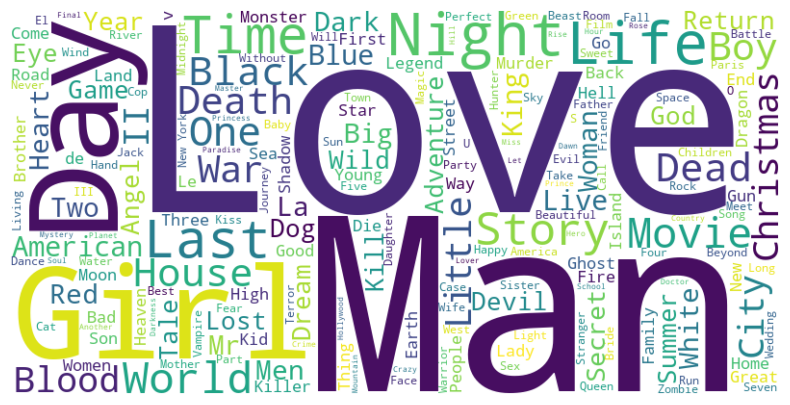

In [7]:
# Nube de palabras para los títulos de películas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(moviesdataset['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
#Sistema de recomendación

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [10]:
# Eliminamos filas con valores faltantes en las columnas relevantes para el análisis
moviesdataset.dropna(subset=['belongs_to_collection', 'genres', 'release_date', 'original_language'], inplace=True)


In [11]:
# Limpiar y estandarizar el texto para facilitar la búsqueda
moviesdataset['title'] = moviesdataset['title'].str.lower().str.strip()

In [12]:
# Gráfico de nube de palabras con las palabras más frecuentes en los títulos de las películas
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


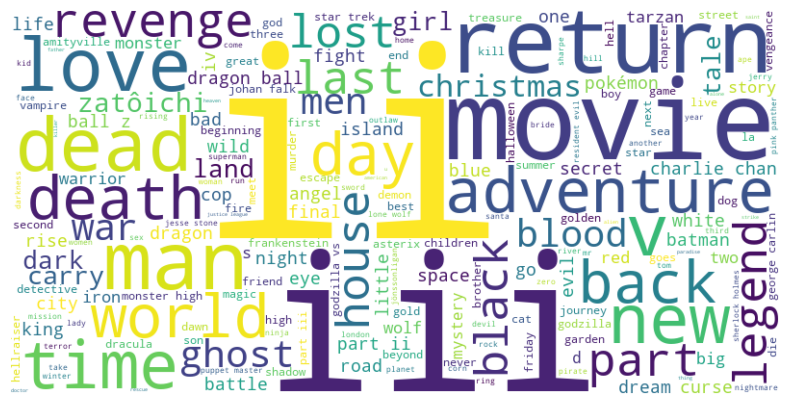

In [13]:
# Concatenar todos los títulos de películas para generar la nube de palabras
titles_text = ' '.join(moviesdataset['title'])
plot_wordcloud(titles_text)

In [14]:
moviesdataset['combined_features'] = (
    moviesdataset['belongs_to_collection'].astype(str) + ' ' +
    moviesdataset['genres'].astype(str) + ' ' +
    moviesdataset['release_date'].astype(str) + ' ' +
    moviesdataset['original_language'].astype(str)
)

In [15]:
# Crear la matriz de características TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(moviesdataset['combined_features'])

# Calcular la similitud del coseno utilizando el kernel lineal
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [16]:
from fuzzywuzzy import fuzz

def recomendacion(titulo):
    # Convertir el título ingresado a minúsculas y eliminar espacios en blanco
    titulo = titulo.lower().strip()

    # Realizar búsqueda difusa para encontrar el título más similar en el DataFrame
    match_scores = moviesdataset['title'].apply(lambda x: fuzz.partial_ratio(x.lower().strip(), titulo))
    best_match_index = match_scores.idxmax()

    # Obtener el índice de la película correspondiente al título más similar
    index = best_match_index

    # Calcular la similitud de la película con el resto de películas
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener los índices de las 5 películas más similares (excluyendo la película consultada)
    similar_movies_indices = [i[0] for i in sim_scores[1:6]]

    # Obtener los nombres de las películas recomendadas
    recommended_movies = moviesdataset['title'].iloc[similar_movies_indices].to_list()
    

    return recommended_movies


In [17]:
recomendaciones = recomendacion('toy story')
print(recomendaciones)

['toy story 2', 'toy story 3', 'a cinderella story', 'madagascar: escape 2 africa', "garfield's fun fest"]


In [18]:
recomendaciones = recomendacion('Lord of the rings')
print(recomendaciones)

['grown ups 2', 'tangled', 'gasland', "porky's ii: the next day", "the good witch's gift"]


In [19]:
recomendaciones = recomendacion('star wars')
print(recomendaciones)

['a nightmare on elm street 5: the dream child', "freddy's dead: the final nightmare", 'a nightmare on elm street 3: dream warriors', 'a nightmare on elm street', 'a nightmare on elm street']


In [20]:
recomendaciones = recomendacion('GoldenEye')
print(recomendaciones)

['pocahontas ii: journey to a new world', 'slam dunk ernest', 'balto', 'tarzan', 'xtro 3: watch the skies']


In [21]:
pip install -r requirements.txt 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
